# Fashion MNIST CNN Training Notebook

In [15]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Load and Preprocess Dataset
# Load the training data from CSV
train_df = pd.read_csv('fashion-mnist_test.csv')

# The first column is the label
y = train_df['label'].values
X = train_df.drop('label', axis=1).values

# Normalize pixel values to [0, 1]
X = X.astype('float32') / 255.0

# Reshape to (num_samples, 28, 28, 1) for CNN
X = X.reshape(-1, 28, 28, 1)

# Display shape
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (10000, 28, 28, 1)
y shape: (10000,)


In [17]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (8000, 28, 28, 1) (8000,)
Test set: (2000, 28, 28, 1) (2000,)


In [18]:
# Define the Model Architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

c:\Users\Ampua\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,962 (1.26 MB)

 Trainable params: 329,962 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#What does compiling the model do?
print("Compiling the model configures/prepares the model for training.")

c:\Users\Ampua\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.5061 - loss: 1.3152 - val_accuracy: 0.7040 - val_loss: 0.7406
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.5061 - loss: 1.3152 - val_accuracy: 0.7040 - val_loss: 0.7406
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6759 - loss: 0.8603 - val_accuracy: 0.7525 - val_loss: 0.6203
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6759 - loss: 0.8603 - val_accuracy: 0.7525 - val_loss: 0.6203
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7211 - loss: 0.7519 - val_accuracy: 0.7515 - val_loss: 0.6084
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7211 - loss: 0.7519 - val_accuracy: 0.7515 - val_loss: 0.6084
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7354 - loss: 0.6920 - val_accuracy: 0.7685 - val_loss: 0.5614
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.7354 - loss: 0.6920 - val_ac

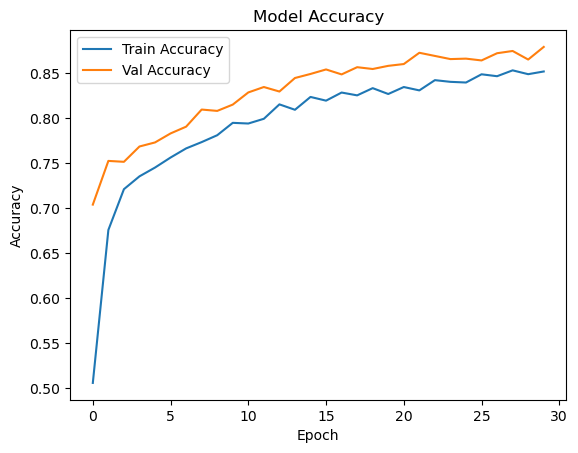

63/63 - 0s - 7ms/step - accuracy: 0.8790 - loss: 0.3270
Test loss: 0.3270
Test accuracy: 0.8790
Test loss: 0.3270
Test accuracy: 0.8790


In [20]:
# Data Augmentation and Training
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

from tensorflow.keras.callbacks import EarlyStopping
callbacks = [EarlyStopping(patience=3, restore_best_weights=True)]
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30, #train longer for better results
    validation_data=(X_test, y_test),
    callbacks=callbacks
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy') #val accuracy = validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Test accuracy
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

In [21]:
# Evaluate Model Performance
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Save the trained model
model.save('fashion2_mnist_cnn.h5')
print('\nModel saved as fashion2_mnist_cnn.h5')


63/63 - 0s - 6ms/step - accuracy: 0.8790 - loss: 0.3270


Test loss: 0.3270
Test accuracy: 0.8790

Model saved as fashion2_mnist_cnn.h5
